In [1]:
# %pip install sportypy

In [264]:
from sportypy.surfaces.baseball import MiLBField
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns

In [267]:
%%capture
%run ./ball_time.ipynb

In [3]:
# %%capture
# %run ./BallDirection.ipynb

In [268]:
%%capture
%run ./throw_time.ipynb

In [269]:
best_sub_90_times_df = pd.read_csv('../../data/derived/fielderspeed/best_sub_90_times_df.csv').drop(columns='Unnamed: 0')
best_sub_90_times_df.head()

,player_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,9762,500.0,650.0,750.0,850.0,950.0,1050.0,1150.0,1200.0,1300.0,1350.0,1400.0,1500.0,1550.0,1600.0,1700.0,1750.0,1800.0,1850.0,1900.0,2000.0,2050.0,2100.0,2150.0,2200.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2650.0,2700.0,2750.0,2800.0,2850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,200.0,400.0,550.0,700.0,750.0,800.0,850.0,900.0,950.0,1050.0,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,4250.0,4300.0,4350.0,4400.0,4450.0,4500.0,4550.0,4600.0,4650.0,4700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2053,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1150.0,1250.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3850.0,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1297,150.0,250.0,350.0,450.0,550.0,650.0,700.0,750.0,850.0,900.0,950.0,1000.0,1050.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2382,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1100.0,1200.0,1250.0,1300.0,1400.0,1450.0,1500.0,1550.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
fielder_max_speed_df = pd.read_csv('../../data/derived/fielderspeed/fielder_max_speed_df.csv').drop(columns='Unnamed: 0')
fielder_max_speed_df.head()

,batter,max_speed
0,1080,24.839231
1,1119,27.418296
2,1144,24.776584
3,1181,27.153289
4,1258,26.489183


In [271]:
max_player_throw_velo = pd.read_csv('../../data/derived/throwtime/max_player_throw_velo_df.csv').drop(columns='Unnamed: 0')
# Get rid of duplicate player_ids. Keep the one with higher max_throw_velo_mph
# max_player_throw_velo = max_player_throw_velo.sort_values(by='max_throw_velo_mph', ascending=False).drop_duplicates(subset='player_id', keep='first')
max_player_throw_velo.shape

(154, 3)

In [272]:
min_tt_player_df = pd.read_csv('../../data/derived/transfer_time/min_tt_player_df.csv')
min_tt_player_df.head()

,player_id,min_transfer_time,player_position
0,1080,550,5
1,1119,700,5
2,1144,900,6
3,1181,550,6
4,1258,800,5


In [273]:
# inf_gb_with_throw_df = pd.read_csv('../../data/derived/plays/inf_gb_with_throw_1b_df.csv').drop(columns=['Unnamed: 0'])

# # Give each player_id a position based on the player_position they played the most
# id_to_pos_df = inf_gb_with_throw_df.groupby(['player_id', 'player_position']).size().reset_index().rename(columns={0:'count'})
# id_to_pos_df = id_to_pos_df.sort_values(by=['player_id', 'count'], ascending=False).drop_duplicates(subset=['player_id'])
# id_to_pos_df = id_to_pos_df[['player_id', 'player_position']]
# id_to_pos_df = id_to_pos_df.set_index('player_id')

# # Give each player_id in max_player_throw_velo, min_tt

# Print if anyone in best_sub_90_times_df is not in max_player_throw_velo OR min_tt_player_df. Also print who is only in one of the two. 
# Also print who plays different positions in max_player_throw_velo and min_tt_player_df
for player_id in best_sub_90_times_df['player_id'].unique():
    if player_id not in max_player_throw_velo['player_id'].unique():
        print(player_id, 'not in max_player_throw_velo')
    if player_id not in min_tt_player_df['player_id'].unique():
        print(player_id, 'not in min_tt_player_df')
    if player_id in max_player_throw_velo['player_id'].unique() and player_id in min_tt_player_df['player_id'].unique():
        if max_player_throw_velo[max_player_throw_velo['player_id'] == player_id]['player_position'].values[0] != min_tt_player_df[min_tt_player_df['player_id'] == player_id]['player_position'].values[0]:
            print('id:', player_id, 'plays different positions in max_player_throw_velo and min_tt_player_df')
            print(f'He plays {max_player_throw_velo[max_player_throw_velo["player_id"] == player_id]["player_position"].values[0]} in max_player_throw_velo and {min_tt_player_df[min_tt_player_df["player_id"] == player_id]["player_position"].values[0]} in min_tt_player_df')

player_skill_df = best_sub_90_times_df.merge(max_player_throw_velo, on='player_id', how='inner').merge(
    min_tt_player_df, on='player_id', how='inner', suffixes=('', '_drop')).merge(
        fielder_max_speed_df, left_on='player_id', right_on='batter', how='inner')
player_skill_df = player_skill_df.drop(columns=['batter', 'player_position_drop'])
player_skill_df.head()

1297 not in min_tt_player_df
2653 not in min_tt_player_df
9609 not in min_tt_player_df
6956 not in min_tt_player_df
8618 not in min_tt_player_df
5196 not in min_tt_player_df
2646 not in min_tt_player_df
9880 not in max_player_throw_velo
6672 not in min_tt_player_df
4050 not in min_tt_player_df


,player_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,max_throw_velo_mph,player_position,min_transfer_time,max_speed
0,9762,500.0,650.0,750.0,850.0,950.0,1050.0,1150.0,1200.0,1300.0,1350.0,1400.0,1500.0,1550.0,1600.0,1700.0,1750.0,1800.0,1850.0,1900.0,2000.0,2050.0,2100.0,2150.0,2200.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2650.0,2700.0,2750.0,2800.0,2850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.508835,5,1300,23.217449
1,1972,200.0,400.0,550.0,700.0,750.0,800.0,850.0,900.0,950.0,1050.0,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,4250.0,4300.0,4350.0,4400.0,4450.0,4500.0,4550.0,4600.0,4650.0,4700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.439297,6,600,24.922802
2,2053,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1150.0,1250.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3850.0,3900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.427619,4,650,24.366606
3,2382,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1100.0,1200.0,1250.0,1300.0,1400.0,1450.0,1500.0,1550.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.912916,5,700,25.620844
4,6697,250.0,600.0,750.0,800.0,900.0,1000.0,1050.0,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4300.0,4350.0,4400.0,NaN,NaN,75.056722,4,600,19.584031


In [274]:
pd.set_option('display.max_columns', None)
player_skill_df.groupby('player_position')[['max_throw_velo_mph', 'min_transfer_time', 'max_speed']].describe()

max_throw_velo_mph                                             \
                             count       mean       std        min        25%   
player_position                                                                 
4                             51.0  69.262961  7.334900  45.889541  65.974538   
5                             29.0  77.807990  5.461746  68.431073  73.804928   
6                             36.0  79.821673  4.753642  71.656460  75.667225   

                                                 min_transfer_time  \
                       50%        75%        max             count   
player_position                                                      
4                69.758545  73.936307  81.353019              51.0   
5                79.377194  81.773240  87.939951              29.0   
6                80.048036  83.006807  90.568311              36.0   

                                                                              \
                       mean         std    min    25%    50%     75%     max   
player_position                                                                
4                791.352941  232.717324  350.0  625.0  750.0   900.0  1300.0   
5                830.758621  241.100698  500.0  650.0  792.0  1000.0  1350.0   
6                752.861111  236.879373  400.0  600.0  700.0   850.0  1453.0   

                max_speed                                             \
                    count       mean       std        min        25%   
player_position                                                        
4                    51.0  22.050656  3.316474  16.974829  19.099804   
5                    29.0  23.763529  3.198401  18.497105  21.585245   
6                    36.0  23.041546  3.368762  16.757439  20.439683   

                                                  
                       50%        75%        max  
player_position                                   
4                21.736254  24.383299  28.199302  
5                24.393797  26.289274  28.956397  
6                22.154126  25.515070  30.724144

In [275]:
# Find the id of the player whos max spede is ~= 25.515070
player_skill_df[(player_skill_df['max_speed'] >= 25) & 
                (player_skill_df['max_speed'] <= 28) &
                (player_skill_df['player_position'] == 5)]

,player_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,max_throw_velo_mph,player_position,min_transfer_time,max_speed
3,2382,150.0,250.0,400.0,500.0,650.0,750.0,900.0,1000.0,1100.0,1200.0,1250.0,1300.0,1400.0,1450.0,1500.0,1550.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.912916,5,700,25.620844
8,1784,500.0,750.0,850.0,900.0,1000.0,1100.0,1150.0,1250.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,4500.0,4550.0,4900.0,4950.0,5000.0,5050.0,5100.0,5150.0,5200.0,5250.0,5300.0,5350.0,5400.0,5450.0,5500.0,5550.0,NaN,NaN,NaN,73.804928,5,700,26.289274
11,1258,350.0,550.0,700.0,850.0,950.0,1050.0,1100.0,1200.0,1250.0,1300.0,1350.0,1400.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0,4500.0,4550.0,4600.0,4650.0,4700.0,4750.0,4800.0,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.806720,5,800,26.489183
13,1119,150.0,250.0,850.0,900.0,950.0,1050.0,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4600.0,4650.0,4700.0,4750.0,4800.0,4850.0,4900.0,4950.0,5000.0,5100.0,5150.0,5250.0,5300.0,5400.0,5500.0,5550.0,5650.0,5750.0,5800.0,NaN,82.545811,5,700,27.418296
23,1771,150.0,250.0,350.0,450.0,600.0,650.0,700.0,750.0,800.0,850.0,900.0,950.0,1000.0,1050.0,1100.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1450.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,3900.0,3950.0,4600.0,4650.0,4700.0,4750.0,4800.0,4850.0,4900.0,4950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.377194,5,550,27.428709
38,4793,250.0,500.0,700.0,850.0,950.0,1050.0,1150.0,1200.0,1250.0,1300.0,1350.0,1400.0,1500.0,1550.0,1600.0,1650.0,1700.0,1750.0,1800.0,1850.0,1900.0,1950.0,2000.0,2050.0,2100.0,2150.0,2200.0,2250.0,2300.0,2350.0,2400.0,2450.0,2500.0,2550.0,2600.0,2650.0,2700.0,2750.0,2800.0,2850.0,2900.0,2950.0,3000.0,3050.0,3100.0,3150.0,3200.0,3250.0,3300.0,3350.0,3400.0,3450.0,3500.0,3550.0,3600.0,3650.0,3700.0,3750.0,3800.0,3850.0,3900.0,3950.0,4000.0,4050.0,4100.0,4150.0,4200.0,4250.0,4300.0,4350.0,4400.0,4450.0

         1      2      3      4      5      6      7      8      9     10  \
118  100.0  150.0  250.0  300.0  400.0  450.0  550.0  600.0  700.0  750.0   

        11     12      13      14      15      16      17      18      19  \
118  850.0  900.0  1000.0  1050.0  1150.0  1200.0  1300.0  1350.0  1450.0   

         20      21      22      23      24      25      26      27      28  \
118  1500.0  1600.0  1650.0  1750.0  1800.0  1850.0  1900.0  1950.0  2000.0   

         29      30      31      32      33      34      35      36      37  \
118  2050.0  2100.0  2150.0  2200.0  2250.0  2300.0  2350.0  2400.0  2450.0   

         38      39      40      41      42      43      44      45      46  \
118  2500.0  2550.0  2600.0  2650.0  2700.0  2750.0  2800.0  2850.0  2900.0   

         47      48      49      50      51      52      53      54      55  \
118  2950.0  3000.0  3050.0  3100.0  3150.0  3200.0  3250.0  3300.0  3350.0   

         56      57      58      59      60      61   

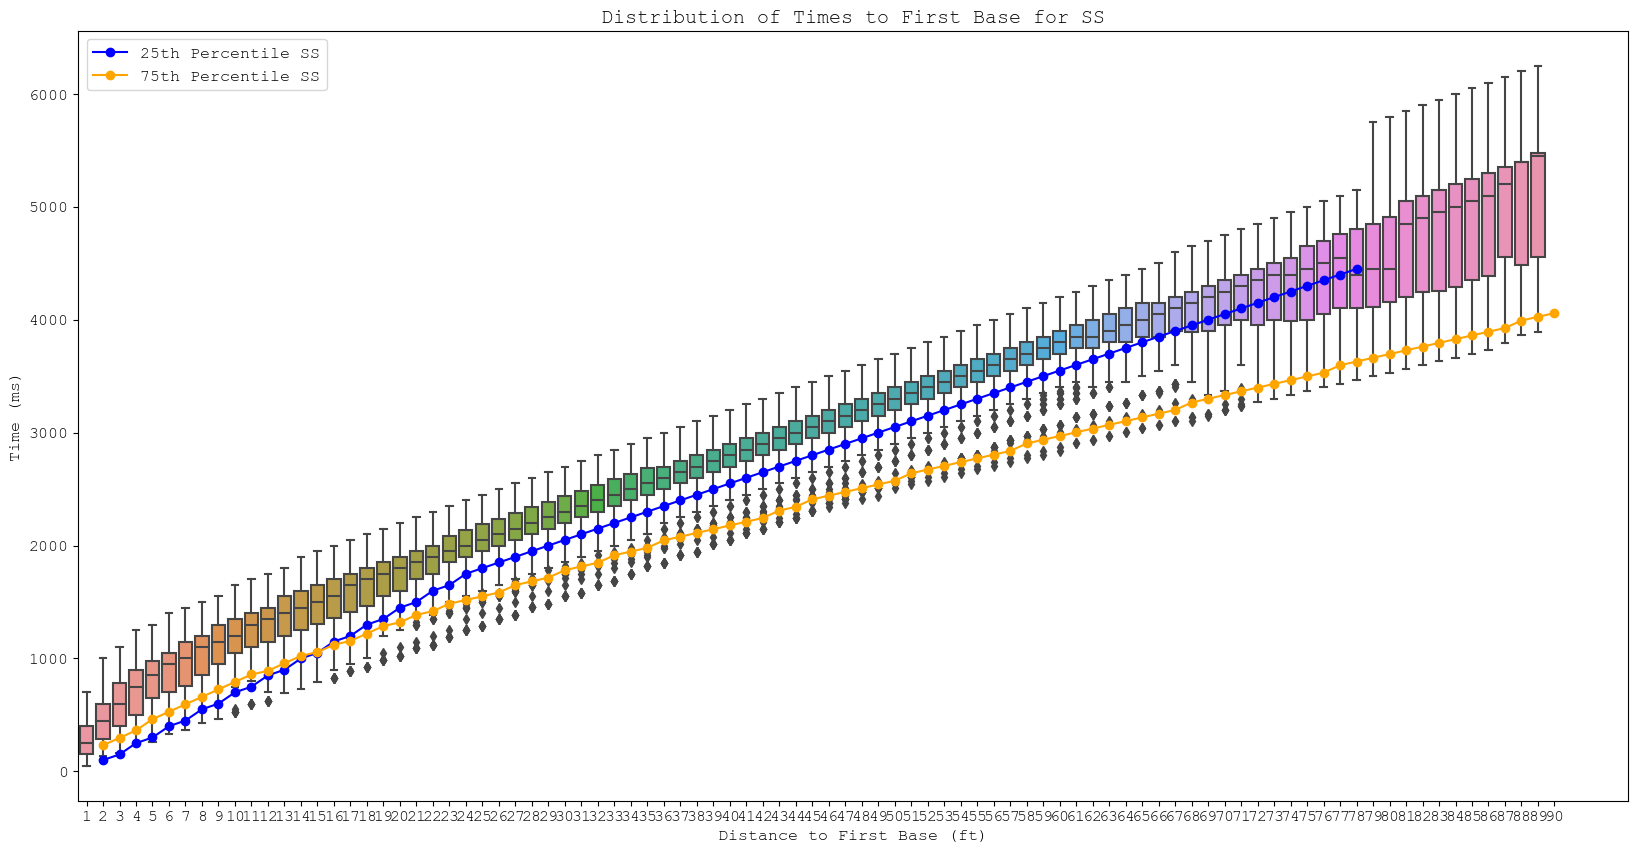

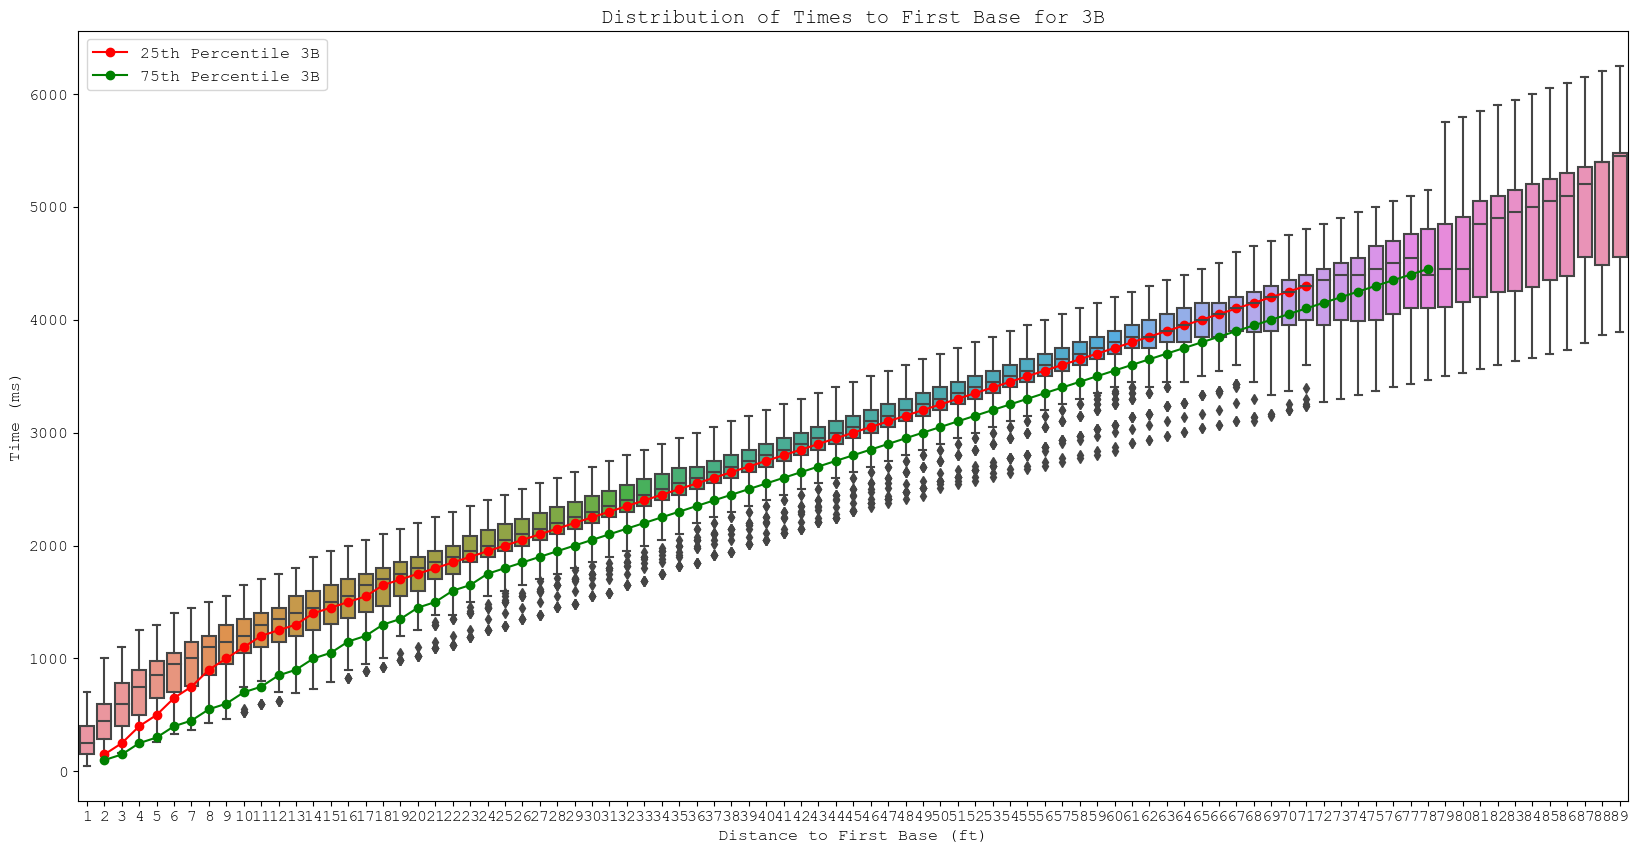

SS Analogy is Rodolfo Castro vs CJ Abrams
3B Analogy is Gio Urshela vs Maikel Garcia


,SS_ball_time,SS_throw_distance,3B_ball_time,3B_throw_distance,25%_SS_throw_time,75%_SS_throw_time,25%_SS_reach_time,75%_SS_reach_time,25%_SS_transfer_time,75%_SS_transfer_time,25%_SS_total_time,75%_SS_total_time,25%_3B_throw_time,75%_3B_throw_time,25%_3B_reach_time,75%_3B_reach_time,25%_3B_transfer_time,75%_3B_transfer_time,25%_3B_total_time,75%_3B_total_time
Distance,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
# def filter_players_by_speed_percentile(data_df, position, percentile, tolerance=0.1):
#     position_speeds = data_df[data_df['player_position'] == position]['max_speed']
#     speed_threshold = position_speeds.quantile(percentile)

#     print(f'Position {position} speed threshold: {speed_threshold}, Percentile: {percentile}')
    
#     filtered_players = data_df[
#         (data_df['player_position'] == position) &
#         (data_df['max_speed'] >= speed_threshold - tolerance) &
#         (data_df['max_speed'] <= speed_threshold + tolerance)
#     ]

#     print(filtered_players['player_id'])
    
#     return filtered_players

# # Usage examples
# ss_25_row = filter_players_by_speed_percentile(player_skill_df, position=6, percentile=0.25)
# ss_75_row = filter_players_by_speed_percentile(player_skill_df, position=6, percentile=0.75)
# thirdbase_25_row = filter_players_by_speed_percentile(player_skill_df, position=5, percentile=0.25)
# thirdbase_75_row = filter_players_by_speed_percentile(player_skill_df, position=5, percentile=0.75)

# 75%SS - 6057, 28.6 mph
# 25%SS - 3326, 27.3 mph
# 75%3B - 7756, 28.0 mph
# 25%3B - 1784, 26.2 mph


ss25_id = 3326
ss75_id = 6057

third25_id = 2382
third75_id = 5656

quantile_25_max_speed_row_ss = best_sub_90_times_df.loc[best_sub_90_times_df['player_id'] == ss25_id]
quantile_75_max_speed_row_ss = best_sub_90_times_df.loc[best_sub_90_times_df['player_id'] == ss75_id]
quantile_25_max_speed_row_3b = best_sub_90_times_df.loc[best_sub_90_times_df['player_id'] == third25_id]
quantile_75_max_speed_row_3b = best_sub_90_times_df.loc[best_sub_90_times_df['player_id'] == third75_id]

cols_to_select = [str(i) for i in np.arange(1, 91)]
quantile_25_sub_90_ss = quantile_25_max_speed_row_ss[cols_to_select]
quantile_75_sub_90_ss = quantile_75_max_speed_row_ss[cols_to_select]
quantile_25_sub_90_3b = quantile_25_max_speed_row_3b[cols_to_select]
quantile_75_sub_90_3b = quantile_75_max_speed_row_3b[cols_to_select]

print(quantile_25_sub_90_ss)

fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=best_sub_90_times_df.iloc[:, 1:], ax=ax)
ax.set_title('Distribution of Times to First Base for SS')
ax.set_xlabel('Distance to First Base (ft)')
ax.set_ylabel('Time (ms)')

# Plot the 25th and 75th percentile max_speed players, skip distance 0
plt.plot(np.arange(1, 91), quantile_25_sub_90_ss.T, marker='o', linestyle='-', color='blue', label='25th Percentile SS')
plt.plot(np.arange(1, 91), quantile_75_sub_90_ss.T, marker='o', linestyle='-', color='orange', label='75th Percentile SS')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=best_sub_90_times_df.iloc[:, 1:], ax=ax)
ax.set_title('Distribution of Times to First Base for 3B')
ax.set_xlabel('Distance to First Base (ft)')
ax.set_ylabel('Time (ms)')

# Plot the 25th and 75th percentile max_speed players
plt.plot(np.arange(1, 91), quantile_25_sub_90_3b.T, marker='o', linestyle='-', color='red', label='25th Percentile 3B')
plt.plot(np.arange(1, 91), quantile_75_sub_90_3b.T, marker='o', linestyle='-', color='green', label='75th Percentile 3B')
plt.legend()
plt.show()

# print(player_skill_df.loc[player_skill_df['player_id'] == ss25_id, 'max_speed'])
# print(player_skill_df.loc[player_skill_df['player_id'] == ss75_id, 'max_speed'])
print('SS Analogy is Rodolfo Castro vs CJ Abrams')
print('3B Analogy is Gio Urshela vs Maikel Garcia')

test_players = pd.DataFrame({
    'player_id': ['25%_SS', '75%_SS', '25%_3B', '75%_3B'],
    'max_throw_velo_mph': [75.667225, 83.006807, 73.804928, 81.7732400],
    'min_transfer_time': [850.0, 600.0, 1000.0, 650.0],
    'speed_id': [ss25_id, ss75_id, third25_id, third75_id]
})

results_df = pd.DataFrame(index=np.arange(1, 91), columns=['SS_ball_time', 'SS_throw_distance',
                                                              '3B_ball_time', '3B_throw_distance',
                                                              '25%_SS_throw_time', '75%_SS_throw_time',
                                                              '25%_SS_reach_time', '75%_SS_reach_time',
                                                              '25%_SS_transfer_time', '75%_SS_transfer_time',                                                              '25%_SS_total_time', '75%_SS_total_time',
                                                                '25%_3B_throw_time', '75%_3B_throw_time',
                                                                '25%_3B_reach_time', '75%_3B_reach_time',
                                                                '25%_3B_transfer_time', '75%_3B_transfer_time',
                                                                '25%_3B_total_time', '75%_3B_total_time'
                                                              ])

results_df.index.name = 'Distance'
results_df.head()

In [277]:
ss_init_vector = np.array([-152.25*np.sin(np.deg2rad(18)), 152.25*np.cos(np.deg2rad(18))])
thirdbase_init_vector = np.array([-128.5*np.sin(np.deg2rad(38)), 128.5*np.cos(np.deg2rad(38))])

RUNNER_TIME = 4484

firstbase_vector = np.array([63.64, 64.64])

# Patrick Wisdom EV based on 2022 avgEV Percentile: https://baseballsavant.mlb.com/savant-player/patrick-wisdom-621550?stats=statcast-r-hitting-mlb
ev = 91.2
res = {}
for idx, data in test_players.iterrows():
    id = data['player_id']
    max_throw_velo_mph = data['max_throw_velo_mph']
    transfer_time = data['min_transfer_time']
    speed_id = data['speed_id']

    # print(f'PlayerID: {id}')

    run_distance = 0.0
    pos = ''
    if id == '25%_SS' or id == '75%_SS':
        run_distance = np.sqrt((ss_init_vector[0])**2 + (ss_init_vector[1])**2)
        pos = 'SS'
        # print(f'Initial SS Distance: {ss_distance}')
    else:
        run_distance = np.sqrt((thirdbase_init_vector[0])**2 + (thirdbase_init_vector[1])**2)
        pos = '3B'
        # print(f'Initial 3B Distance: {thirdbase_distance}')

    i = 1
    total_time = 0
    while total_time < RUNNER_TIME:
        hypotenuse_len = np.sqrt((run_distance)**2 + (i**2))
        # print(f'Hypotenuse: {hypotenuse_len}')
        # print(f'Distance from start pos: {i}')

        # model - BallTimeModel([['distance_to_home', 'exit_velo']])
        ball_time_prediction_data = pd.DataFrame({'distance_to_home': [hypotenuse_len], 'exit_velocity': [ev]})
        ball_time = ball_pos_lin_model.predict(ball_time_prediction_data)[0]

        speed_time_row = best_sub_90_times_df.loc[best_sub_90_times_df['player_id'] == speed_id]
        reach_time = speed_time_row[str(i)].values[0]
        results_df.loc[i, f'{id}_reach_time'] = reach_time

        # if they cannot get to this ball
        if reach_time >= ball_time:
            ball_time = float('inf')
        # if they can get to this ball
        else:
            # total_throw_distance = first_base_vector - (ss_init_vector + <-ss_init_vector.y, -ss_init_vector.x>)
            perpendicular_vector = np.array([-ss_init_vector[1], -ss_init_vector[0]])
            perpendicular_vector = i * (perpendicular_vector / np.linalg.norm(perpendicular_vector))
            # print(f'Perpendicular Vector: {perpendicular_vector}')

            # knn_model - ThrowTimeMode([['total_throw_distance', 'throw_velo_mph']]). Use magnitude of firstbase_vector - (ss_init_vector + perpendicular_vector)
            total_throw_distance = np.sqrt((firstbase_vector[0] - (ss_init_vector[0] + perpendicular_vector[0]))**2 + 
                                        (firstbase_vector[1] - (ss_init_vector[1] + perpendicular_vector[1]))**2)
            # print(f'Total Throw Distance: {total_throw_distance}')
            results_df.loc[i, f'{pos}_throw_distance'] = total_throw_distance

            throw_time_prediction_data = pd.DataFrame({'total_throw_distance': [total_throw_distance], 'throw_velo_mph': [max_throw_velo_mph]})
            throw_time = throw_time_lin_model.predict(throw_time_prediction_data)[0]
            results_df.loc[i, f'{id}_throw_time'] = throw_time

            # print(f'Total Time: {ball_time + transfer_time + throw_time} vs. Runner Time: 4.5\n\n')
        results_df.loc[i, f'{pos}_ball_time'] = ball_time
        results_df.loc[i, f'{id}_transfer_time'] = transfer_time
        total_time = ball_time + transfer_time + throw_time
        results_df.loc[i, f'{id}_total_time'] = total_time
        i += 1
    res[id] = i

results_df.to_csv('../../data/derived/results.csv')

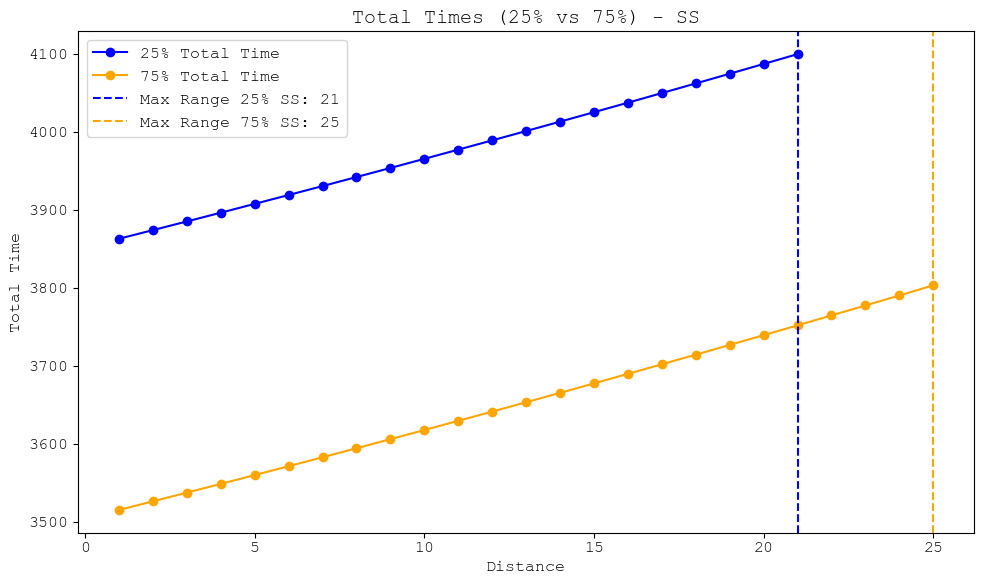

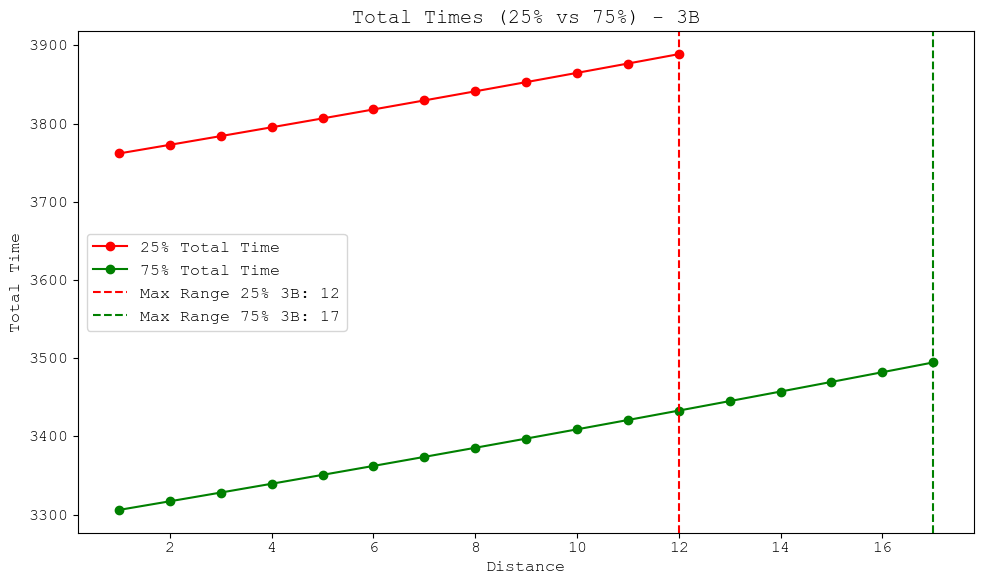

In [279]:
def plot_total_times(data_df, position, colors):
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(data_df.index, data_df[f'25%_{position}_total_time'], color=colors[0], marker='o', label=f'25% Total Time')
    ax.plot(data_df.index, data_df[f'75%_{position}_total_time'], color=colors[1], marker='o', label=f'75% Total Time')

    inf_indices = [index for index, value in enumerate(data_df[f'25%_{position}_total_time']) if value == float('inf')]
    for index in inf_indices:
        ax.axvline(x=index, color=colors[0], linestyle='--', label=f'Max Range 25% {position}: {index}')

    last_valid_75_index = data_df[f'75%_{position}_total_time'].replace(float('inf'), float('-inf')).last_valid_index()
    if last_valid_75_index is not None:
        ax.axvline(x=last_valid_75_index - 1, color=colors[1], linestyle='--', label=f'Max Range 75% {position}: {last_valid_75_index - 1}')

    ax.set_xlabel('Distance')
    ax.set_ylabel('Total Time')
    ax.set_title(f'Total Times (25% vs 75%) - {position}')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Call the function for separate plots
plot_total_times(results_df, 'SS', ['b', 'orange'])
plot_total_times(results_df, '3B', ['r', 'g'])


In [29]:
# player_skill_df = max_player_throw_velo.merge(min_tt_player_df[['player_id', 'min_transfer_time']], on='player_id', how='inner')
# player_skill_df = player_skill_df.merge(player_max_speed, on='player_id', how='inner')
# # Number of players in player_skill_df
# print(f'Number of players in player_skill_df: {len(player_skill_df)}')
# player_skill_df.head()

Number of players in player_skill_df: 35


,player_id,max_throw_velo_mph,min_transfer_time,max_speed,player_position
0,1119,82.545811,700,26.401426,third_base
1,1181,82.779293,550,23.516774,shortstop
2,1258,68.806720,800,23.110004,third_base
3,1557,76.111079,700,22.559279,second_base
4,1607,82.862644,650,22.823875,second_base


In [19]:
player_skill_df.describe()

,player_id,max_throw_velo_mph,min_transfer_time,max_speed
count,35.000000,35.000000,35.000000,35.000000
mean,3798.085714,78.297328,692.857143,24.018774
std,2584.615142,5.951804,172.414880,1.418046
min,1119.000000,66.775020,500.000000,22.544579
25%,1972.000000,74.392882,600.000000,22.945941
50%,2386.000000,80.656833,650.000000,23.556196
75%,5295.000000,82.820968,750.000000,24.596289
max,9423.000000,86.376773,1200.000000,27.115025


In [58]:
# print(player_skill_df.nlargest(10, 'max_speed'))

pd.set_option('display.max_rows', 100)
player_skill_df.loc[player_skill_df['player_position'] == 'shortstop'].nsmallest(75, 'max_speed')

# ~4.5 seconds to reach first base

# Candidates for GOOD SS
# *1972*, 1119, 7756

# Candidates for BAD SS
# 2386, 

,player_id,max_throw_velo_mph,min_transfer_time,max_speed,player_position
13,2148,86.376773,750,23.068008,shortstop
1,1181,82.779293,550,23.516774,shortstop
21,3748,75.955669,800,23.674642,shortstop
15,2235,81.353019,500,23.716913,shortstop
29,7947,73.567459,650,25.302298,shortstop
10,1972,83.439297,600,27.115025,shortstop


In [ ]:
# ss_init_vector = np.array([-152.25*np.sin(np.deg2rad(18)), 152.25*np.cos(np.deg2rad(18))])
# thirdbase_init_vector = np.array([-128.5*np.sin(np.deg2rad(38)), 128.5*np.cos(np.deg2rad(38))])

# firstbase_vector = np.array([63.64, 64.64])

# # players = {
# #     1972: 'good_ss',
# #     1181: 'bad_ss',
# #     # -1: 'good_3b',
# #     # -1: 'bad_3b',
# # }

# # Patrick Wisdom EV based on 2022 avgEV Percentile
# ev = 91.2

# def get_reach_time(i, ev, fielder_speed):
#     slower_ids = player_max_speed.loc[player_max_speed['max_speed'] < fielder_speed]['player_id'].values
#     plays_with_similar_distance = player_max_speed_total_distance_on_play.loc[
#         (player_max_speed_total_distance_on_play['total_distance'] < i + 2) &
#         (player_max_speed_total_distance_on_play['total_distance'] > i - 2)
#     ]

#     plays_with_similar_distance = plays_with_similar_distance.loc[plays_with_similar_distance['player_id'].isin(slower_ids)]
#     reach_time = plays_with_similar_distance['contact_to_field_time'].min()
    
#     return reach_time

# res = {}
# for idx, data in test_players.iterrows():
#     id = data['player_id']
#     max_throw_velo_mph = data['max_throw_velo_mph']
#     transfer_time = data['min_transfer_time']
#     max_speed = data['max_speed']

#     print(f'PlayerID: {id}')
#     # player_data = player_skill_df.loc[player_skill_df['player_id'] == id]
#     # transfer_time = player_data['min_transfer_time'].values[0]
#     # max_throw_velo_mph = player_data['max_throw_velo_mph'].values[0]
#     # max_speed = player_data['max_speed'].values[0]




#     # print(f'{id} transfer time: {transfer_time}')
#     # print(f'{id} max throw velo: {max_throw_velo_mph}')
#     # print(f'{id} max speed: {max_speed}')

#     if id == 'shortstop_25%' or id == 'shortstop_75%':
#         ss_distance = np.sqrt((ss_init_vector[0])**2 + (ss_init_vector[1])**2)
#         print(f'Initial SS Distance: {ss_distance}')
#     else:
#         thirdbase_distance = np.sqrt((thirdbase_init_vector[0])**2 + (thirdbase_init_vector[1])**2)

#     i = 1
#     reach_time, ball_time = -1, 0
#     while reach_time < ball_time:
#         hypotenuse_len = np.sqrt((ss_distance)**2 + (i**2))
#         # print(f'Hypotenuse: {hypotenuse_len}')
#         # print(f'Distance from start pos: {i}')

#         # model - BallTimeModel([['distance_to_home', 'exit_velo']])
#         ball_time_prediction_data = pd.DataFrame({'distance_to_home': [hypotenuse_len], 'exit_velocity': [ev]})
#         ball_time = ball_pos_lin_model.predict(ball_time_prediction_data)
#         # print(f'BallTime: {ball_time}')
        
#         # total_throw_distance = first_base_vector - (ss_init_vector + <-ss_init_vector.y, -ss_init_vector.x>)
#         perpendicular_vector = np.array([-ss_init_vector[1], -ss_init_vector[0]])
#         perpendicular_vector = i * (perpendicular_vector / np.linalg.norm(perpendicular_vector))
#         # print(f'Perpendicular Vector: {perpendicular_vector}')

#         # knn_model - ThrowTimeMode([['total_throw_distance', 'throw_velo_mph']]). Use magnitude of firstbase_vector - (ss_init_vector + perpendicular_vector)
#         total_throw_distance = np.sqrt((firstbase_vector[0] - (ss_init_vector[0] + perpendicular_vector[0]))**2 + 
#                                        (firstbase_vector[1] - (ss_init_vector[1] + perpendicular_vector[1]))**2)
#         # print(f'Total Throw Distance: {total_throw_distance}')

#         throw_time_prediction_data = pd.DataFrame({'total_throw_distance': [total_throw_distance], 'throw_velo_mph': [max_throw_velo_mph]})
#         throw_time = throw_time_lin_model.predict(throw_time_prediction_data)
#         # print(f'ThrowTime: {throw_time}')

#         reach_time = get_reach_time(i, ev, max_speed)
#         # print(f'ReachTime: {reach_time}')

#         # print(f'Total Time: {ball_time + transfer_time + throw_time} vs. Runner Time: 4.5\n\n')
#         if reach_time > ball_time or (ball_time + transfer_time + throw_time) >= 4500:
#             print(f'Distance from start pos: {i}')
#             print(f'BallTime: {ball_time}')
#             print(f'Total Throw Distance: {total_throw_distance}')
#             print(f'ThrowTime: {throw_time}')
#             print(f'ReachTime: {reach_time}')
#             print(f'Total Time: {ball_time + transfer_time + throw_time} vs. Runner Time: 4.5\n\n')
#             break
#         i += 1
#     print(f'Max Reach Distance: {i}\n\n')
#     res[id] = i
    
# # player_id	max_throw_velo_mph	min_transfer_time	max_speed	player_position
# # 1	    1181	82.779293	        550	            23.516774	shortstop
# # 0	    1972	83.439297	        600	            27.115025	shortstop

# # (11.467034019253978 * 143.34) - (13.267432180194362 * 83.439) + 833.6562738445668 = 1370
# # (11.467034019253978 * 143.34) - (13.267432180194362 * 69.324) + 833.6562738445668 = 1557.59

In [322]:
def draw(player_name, base_ss, base_3b, rates, is_base=False, ss_is_good=True, tb_is_good=True, perp_ss_l=None, perp_ss_r=None, perp_3b_l=None, perp_3b_r=None):
    SPLIT_LEFT = np.array([175*np.sin(np.deg2rad(15)), 175*np.cos(np.deg2rad(15))])
    SPLIT_RIGHT = np.array([-175*np.sin(np.deg2rad(15)), 175*np.cos(np.deg2rad(15))])

    field = MiLBField()
    fig, ax = plt.subplots(1, 1)
    field.draw(ax=ax, display_range='infield')

    # Split the field
    field.arrow(0, 0, SPLIT_LEFT[0], SPLIT_LEFT[1], color='white')
    field.arrow(0, 0, SPLIT_RIGHT[0], SPLIT_LEFT[1], color='white')
    field.arrow(0, 0, 0, 175, color='white')

    ax.text(-70, 100, f'{rates["Pull"]}%', color='blue', fontsize=10, zorder=20)
    ax.text(-10.5, 147, f'{rates["Straight"]}%', color='blue', fontsize=10, zorder=22)
    ax.text(-27.5, 130, f'{rates["Straight"] / 2.0}%', color='blue', fontsize=10, zorder=20)
    ax.text(10, 130, f'{rates["Straight"] / 2.0}%', color='blue', fontsize=10, zorder=20)
    ax.text(55, 100, f'{rates["Opposite"]}%', color='blue', fontsize=10, zorder=20)

    # Initial Position
    if not is_base:
        ss_color = 'green' if ss_is_good else 'red'
        tb_color = 'green' if tb_is_good else 'red'
    else:
        ss_color = 'black'
        tb_color = 'black'

    field.scatter(base_3b[0], base_3b[1], color=tb_color, zorder=20)
    field.scatter(base_ss[0], base_ss[1], color=ss_color, zorder=20)
    
    if perp_ss_l is not None:
        field.arrow(base_ss[0], base_ss[1], base_ss[0] + perp_ss_l[0], base_ss[1] + perp_ss_l[1], color=ss_color, zorder=20)
    if perp_ss_r is not None:
        field.arrow(base_ss[0], base_ss[1], base_ss[0] + perp_ss_r[0], base_ss[1] + perp_ss_r[1], color=ss_color, zorder=20)
    if perp_3b_l is not None:
        field.arrow(base_3b[0], base_3b[1], base_3b[0] + perp_3b_l[0], base_3b[1] + perp_3b_l[1], color=tb_color, zorder=20)
    if perp_3b_r is not None:
        field.arrow(base_3b[0], base_3b[1], base_3b[0] + perp_3b_r[0], base_3b[1] + perp_3b_r[1], color=tb_color, zorder=20)

    if not is_base:
        title_ss = 'Good' if ss_is_good else 'Bad'
        title_tb = 'Good' if tb_is_good else 'Bad'
    else:
        title_ss = 'Base'
        title_tb = 'Base'
    ax.set_title(f'Infield Positioning against "{player_name}" (SS: {title_ss}, 3B: {title_tb})', fontsize=10)



BATTER_NAME = 'Patrick Wisdom'

RATES = {
    'Pull': 48.1,
    'Straight': 32.2,
    'Opposite': 19.7
}

BASE_SS = np.array([-152.25*np.sin(np.deg2rad(18)), 
                     152.25*np.cos(np.deg2rad(18))])

BASE_3B = np.array([-128.5*np.sin(np.deg2rad(38)),
                        128.5*np.cos(np.deg2rad(38))])

GOOD_SS_UNITS = 25
BAD_SS_UNITS = 21
GOOD_3B_UNITS = 17
BAD_3B_UNITS = 12

def calculate_perpendicular_vectors(input_vector, magnitude):
    vx, vy = input_vector
    
    v_perp1 = np.array([vy, -vx])
    v_perp2 = np.array([-vy, vx])
    
    v_perp1_normalized = (v_perp1 / np.linalg.norm(v_perp1)) * magnitude
    v_perp2_normalized = (v_perp2 / np.linalg.norm(v_perp2)) * magnitude
    
    return v_perp1_normalized, v_perp2_normalized

GOOD_SS_PERP1, GOOD_SS_PERP2 = calculate_perpendicular_vectors(BASE_SS, GOOD_SS_UNITS)
BAD_SS_PERP1, BAD_SS_PERP2 = calculate_perpendicular_vectors(BASE_SS, BAD_SS_UNITS)
GOOD_3B_PERP1, GOOD_3B_PERP2 = calculate_perpendicular_vectors(BASE_3B, GOOD_3B_UNITS)
BAD_3B_PERP1, BAD_3B_PERP2 = calculate_perpendicular_vectors(BASE_3B, BAD_3B_UNITS)

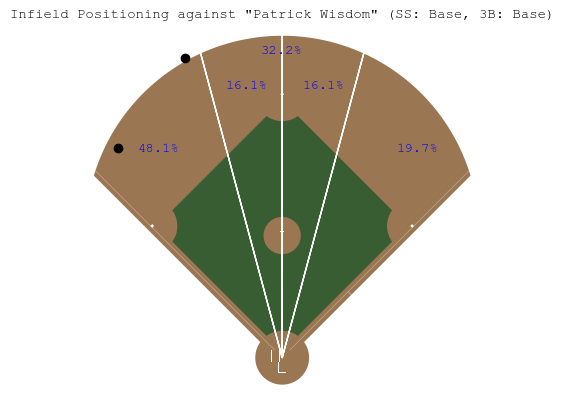

In [325]:
draw(BATTER_NAME, BASE_SS, BASE_3B, RATES, is_base=True)

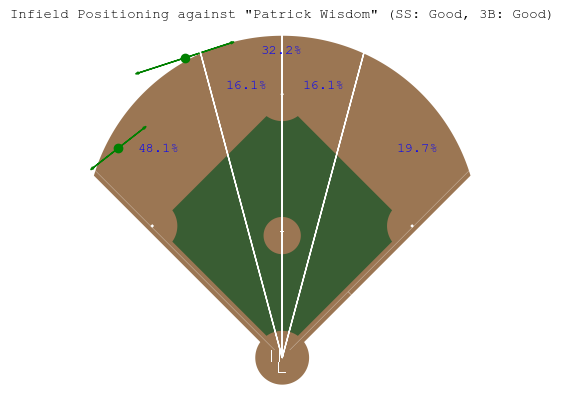

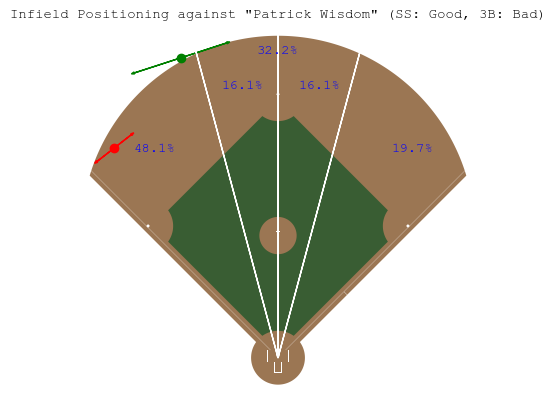

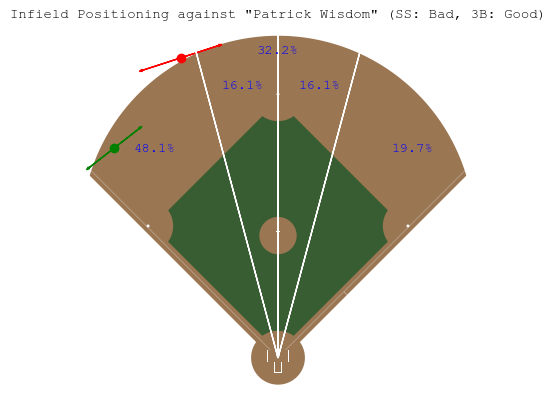

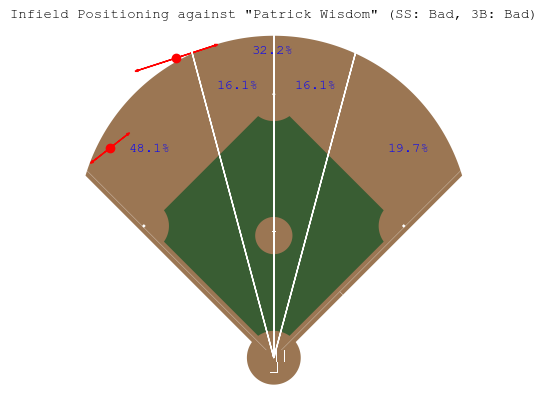

In [323]:
# draw() all combinations of GOOD_SS, BAD_SS, GOOD_3B, BAD_3B as perps
draw(BATTER_NAME, BASE_SS, BASE_3B, RATES, ss_is_good=True, tb_is_good=True, perp_ss_l=GOOD_SS_PERP1, perp_ss_r=GOOD_SS_PERP2, perp_3b_l=GOOD_3B_PERP1, perp_3b_r=GOOD_3B_PERP2)
draw(BATTER_NAME, BASE_SS, BASE_3B, RATES, ss_is_good=True, tb_is_good=False, perp_ss_l=GOOD_SS_PERP1, perp_ss_r=GOOD_SS_PERP2, perp_3b_l=BAD_3B_PERP1, perp_3b_r=BAD_3B_PERP2)
draw(BATTER_NAME, BASE_SS, BASE_3B, RATES, ss_is_good=False, tb_is_good=True, perp_ss_l=BAD_SS_PERP1, perp_ss_r=BAD_SS_PERP2, perp_3b_l=GOOD_3B_PERP1, perp_3b_r=GOOD_3B_PERP2)
draw(BATTER_NAME, BASE_SS, BASE_3B, RATES, ss_is_good=False, tb_is_good=False, perp_ss_l=BAD_SS_PERP1, perp_ss_r=BAD_SS_PERP2, perp_3b_l=BAD_3B_PERP1, perp_3b_r=BAD_3B_PERP2)

Text(0.5, 1.0, 'Infield Positioning against "Patrick Wisdom" (SS: Both, 3B: Both)')

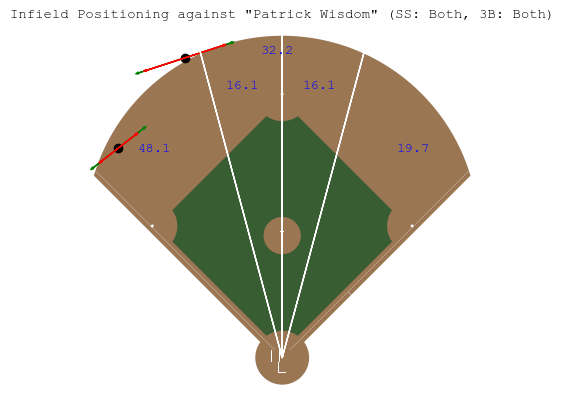

In [324]:
SPLIT_LEFT = np.array([175*np.sin(np.deg2rad(15)), 175*np.cos(np.deg2rad(15))])
SPLIT_RIGHT = np.array([-175*np.sin(np.deg2rad(15)), 175*np.cos(np.deg2rad(15))])

field = MiLBField()
fig, ax = plt.subplots(1, 1)
field.draw(ax=ax, display_range='infield')

# Split the field
field.arrow(0, 0, SPLIT_LEFT[0], SPLIT_LEFT[1], color='white')
field.arrow(0, 0, SPLIT_RIGHT[0], SPLIT_LEFT[1], color='white')
field.arrow(0, 0, 0, 175, color='white')

ax.text(-70, 100, f'{RATES["Pull"]}', color='blue', fontsize=10, zorder=20)
ax.text(-10.5, 147, f'{RATES["Straight"]}', color='blue', fontsize=10, zorder=22)
ax.text(-27.5, 130, f'{RATES["Straight"] / 2.0}', color='blue', fontsize=10, zorder=20)
ax.text(10, 130, f'{RATES["Straight"] / 2.0}', color='blue', fontsize=10, zorder=20)
ax.text(55, 100, f'{RATES["Opposite"]}', color='blue', fontsize=10, zorder=20)

field.scatter(BASE_3B[0], BASE_3B[1], color='black', zorder=20)
field.scatter(BASE_SS[0], BASE_SS[1], color='black', zorder=20)

# Draw all 4 perp vectors with alpha. Color mapping is GOODSS = green, BADSS = red GOOD3B = green, BAD3B = red
field.arrow(BASE_SS[0], BASE_SS[1], BASE_SS[0] + GOOD_SS_PERP1[0], BASE_SS[1] + GOOD_SS_PERP1[1], color='green', zorder=20)
field.arrow(BASE_SS[0], BASE_SS[1], BASE_SS[0] + GOOD_SS_PERP2[0], BASE_SS[1] + GOOD_SS_PERP2[1], color='green', zorder=20)
field.arrow(BASE_SS[0], BASE_SS[1], BASE_SS[0] + BAD_SS_PERP1[0], BASE_SS[1] + BAD_SS_PERP1[1], color='red', zorder=20)
field.arrow(BASE_SS[0], BASE_SS[1], BASE_SS[0] + BAD_SS_PERP2[0], BASE_SS[1] + BAD_SS_PERP2[1], color='red', zorder=20)

field.arrow(BASE_3B[0], BASE_3B[1], BASE_3B[0] + GOOD_3B_PERP1[0], BASE_3B[1] + GOOD_3B_PERP1[1], color='green', zorder=20)
field.arrow(BASE_3B[0], BASE_3B[1], BASE_3B[0] + GOOD_3B_PERP2[0], BASE_3B[1] + GOOD_3B_PERP2[1], color='green', zorder=20)
field.arrow(BASE_3B[0], BASE_3B[1], BASE_3B[0] + BAD_3B_PERP1[0], BASE_3B[1] + BAD_3B_PERP1[1], color='red', zorder=20)
field.arrow(BASE_3B[0], BASE_3B[1], BASE_3B[0] + BAD_3B_PERP2[0], BASE_3B[1] + BAD_3B_PERP2[1], color='red', zorder=20)

ax.set_title(f'Infield Positioning against "{BATTER_NAME}" (SS: Both, 3B: Both)', fontsize=10)